<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))
dfCovidtracking.set_index(['date'], inplace=True)


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-31-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0, usecols=[0,1,2,3,4,5,6,7,8,9,10,11],
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [91]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-29,1736571,96891,23934.0,1186.0
2020-05-30,1759693,97880,23122.0,989.0
2020-05-31,1783570,98536,23877.0,656.0


In [92]:
dfCovidtracking.loc[dfCovidtracking.state=='CA'].groupby(by='date').sum()[['positive', 'death', 'positiveIncrease', 'deathIncrease']].tail()

,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-27,98980,3884,2247.0,70.0
2020-05-28,101697,3973,2717.0,89.0
2020-05-29,103886,4068,2189.0,95.0
2020-05-30,106878,4156,2992.0,88.0
2020-05-31,110583,4213,3705.0,57.0


In [93]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.index.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1783570
Total deaths = 98536


,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,
NY,370770,1693055,0,3436.0,89590.0,1050.0,0.0,791.0,0.0,65934.0,A,5/31/2020 00:00,3c8e24833dab2a94510794010e6df5e6a3b7618d,2020-05-31T20:00:00Z,23905,89590.0,2063825,2063825,2063825,36,57.0,190.0,57334.0,1110.0,58444.0
NJ,160445,585700,0,2497.0,17197.0,522.0,0.0,378.0,0.0,26560.0,A+,5/31/2020 13:00,94f7dbe0bf5b6b0ff910924d6919ab83a47310c9,2020-05-31T20:00:00Z,11698,17197.0,746145,746145,746145,34,64.0,76.0,0.0,837.0,837.0
IL,120260,777999,0,3296.0,0.0,941.0,0.0,550.0,0.0,0.0,A,5/31/2020 00:00,c39076af468eefc51b5e2da6dfe93d79eb3db304,2020-05-31T20:00:00Z,5390,0.0,898259,898259,898259,17,60.0,0.0,19811.0,1343.0,21154.0
CA,110583,1834265,0,4331.0,0.0,1324.0,0.0,0.0,0.0,0.0,B,5/30/2020 00:00,5be9b4ad29d323d453735c9c0ab00da36b6941b9,2020-05-31T20:00:00Z,4213,0.0,1944848,1944848,1944848,06,57.0,0.0,52548.0,3705.0,56253.0
MA,96965,495888,0,1824.0,9823.0,436.0,0.0,0.0,0.0,0.0,A,5/31/2020 10:00,8b5f21ad79dd6e9ac04498a4f039a09f3b4b868d,2020-05-31T20:00:00Z,6846,9823.0,592853,592853,592853,25,78.0,34.0,9670.0,664.0,10334.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [95]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
124,2020-05-25,1654829,14604942,92464,19069.0,523.0,0.927818
125,2020-05-26,1671035,14907041,93093,16206.0,629.0,0.936905
126,2020-05-27,1689630,15192481,94352,18595.0,1259.0,0.947330
127,2020-05-28,1712637,15607239,95705,23007.0,1353.0,0.960230
128,2020-05-29,1736571,16099515,96891,23934.0,1186.0,0.973649
129,2020-05-30,1759693,16495443,97880,23122.0,989.0,0.986613
130,2020-05-31,1783570,16936891,98536,23877.0,656.0,1.000000


In [96]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
82,2020-05-25,94558,1644102,3795,1848.0,21.0,0.855086
83,2020-05-26,96733,1696396,3814,2175.0,19.0,0.874755
84,2020-05-27,98980,1736894,3884,2247.0,70.0,0.895074
85,2020-05-28,101697,1790559,3973,2717.0,89.0,0.919644
86,2020-05-29,103886,1835478,4068,2189.0,95.0,0.939439
87,2020-05-30,106878,1888595,4156,2992.0,88.0,0.966496
88,2020-05-31,110583,1944848,4213,3705.0,57.0,1.000000


In [97]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-27,1689630,13502851,3132,37253.0,203474.0,8551.0,8015.0,4222.0,666.0,391508.0,94352,203474.0,15195613,15192481,15192481,1259.0,1602.0,266845.0,18595.0,285440.0
2020-05-28,1712637,13894602,1906,36967.0,205974.0,8389.0,8109.0,4080.0,676.0,399991.0,95705,205974.0,15609145,15607239,15607239,1353.0,2500.0,391751.0,23007.0,414758.0
2020-05-29,1736571,14362944,2978,35871.0,207694.0,8175.0,8235.0,4032.0,689.0,406446.0,96891,207694.0,16102493,16099515,16099515,1186.0,1720.0,468342.0,23934.0,492276.0
2020-05-30,1759693,14735750,1668,34650.0,209134.0,7956.0,8305.0,4004.0,698.0,416461.0,97880,209134.0,16497111,16495443,16495443,989.0,1440.0,372806.0,23122.0,395928.0
2020-05-31,1783570,15153321,3270,33840.0,210083.0,7623.0,8445.0,3669.0,704.0,444758.0,98536,210083.0,16940161,16936891,16936891,656.0,949.0,417571.0,23877.0,441448.0


In [98]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-27,98980,1637914,0,4544.0,0.0,1407.0,0.0,0.0,0.0,0.0,3884,0.0,1736894,1736894,1736894,70.0,0.0,38251.0,2247.0,40498.0
2020-05-28,101697,1688862,0,4529.0,0.0,1325.0,0.0,0.0,0.0,0.0,3973,0.0,1790559,1790559,1790559,89.0,0.0,50948.0,2717.0,53665.0
2020-05-29,103886,1731592,0,4414.0,0.0,1328.0,0.0,0.0,0.0,0.0,4068,0.0,1835478,1835478,1835478,95.0,0.0,42730.0,2189.0,44919.0
2020-05-30,106878,1781717,0,4215.0,0.0,1273.0,0.0,0.0,0.0,0.0,4156,0.0,1888595,1888595,1888595,88.0,0.0,50125.0,2992.0,53117.0
2020-05-31,110583,1834265,0,4331.0,0.0,1324.0,0.0,0.0,0.0,0.0,4213,0.0,1944848,1944848,1944848,57.0,0.0,52548.0,3705.0,56253.0


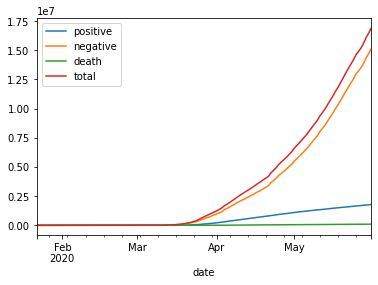

In [99]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

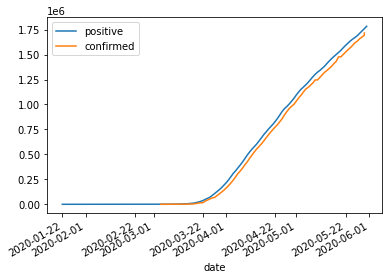

In [100]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [172]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1790172
dead          104381
dtype: int64

In [173]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    111951
dead           4172
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [175]:
dfJHUData.head()

,FIPS,city,state,country,last_update,lat,lon,confirmed,dead,recovered,active,key
0,45001.0,Abbeville,South Carolina,US,2020-06-01 02:32:46,34.223334,-82.461707,42,0,0,42,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-06-01 02:32:46,30.295065,-92.414197,418,23,0,395,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-06-01 02:32:46,37.767072,-75.632346,909,12,0,897,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-06-01 02:32:46,43.452658,-116.241552,812,22,0,790,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-06-01 02:32:46,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US"


In [176]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1790172
Brazil             514849
Russia             405843
United Kingdom     276156
Spain              239479
Italy              232997
India              190609
France             189009
Germany            183410
Peru               164476
Name: confirmed, dtype: int64

In [177]:
dfctd_state_curr.head()

,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,
AK,434,51261,0,14.0,0.0,0.0,0.0,2.0,0.0,368.0,A,5/30/2020 00:00,f31f4703625aca4ceabcfc54844fbdda98505b2a,2020-05-31T20:00:00Z,10,0.0,51695,51695,51695,02,0.0,0.0,0.0,0.0,0.0
AL,17903,199650,0,0.0,1844.0,0.0,589.0,0.0,355.0,9355.0,B,5/31/2020 00:00,e88af16457d25e54a7e9d285e063d6f0187a6039,2020-05-31T20:00:00Z,631,1844.0,217553,217553,217553,01,13.0,18.0,4808.0,544.0,5352.0
AR,7253,122262,0,115.0,711.0,0.0,0.0,27.0,123.0,5275.0,A,5/30/2020 15:13,0820b4e742764fc5cab5046a7517349ee41f87ed,2020-05-31T20:00:00Z,133,711.0,129515,129515,129515,05,0.0,9.0,2778.0,240.0,3018.0
AS,0,174,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,5/29/2020 00:00,65d70dc86ab935c941b5ed1a1ed4011164e810c7,2020-05-31T20:00:00Z,0,0.0,174,174,174,60,0.0,0.0,0.0,0.0,0.0
AZ,19936,205270,0,973.0,2998.0,376.0,0.0,239.0,0.0,4761.0,A+,5/31/2020 00:00,35f3214e4ce8f202a53c8b5e73931f3b779bcddb,2020-05-31T20:00:00Z,906,2998.0,225206,225206,225206,04,3.0,18.0,7478.0,681.0,8159.0


In [0]:
dfState = dfCovidtracking.reset_index()[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [180]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-05-31,56163,2534,56163,1.000000
FL,2020-05-30,55424,2530,56163,0.986842
FL,2020-05-29,54497,2495,56163,0.970336
FL,2020-05-28,53285,2446,56163,0.948756
FL,2020-05-27,52634,2400,56163,0.937165
FL,2020-05-26,52255,2338,56163,0.930417
FL,2020-05-25,51746,2331,56163,0.921354


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

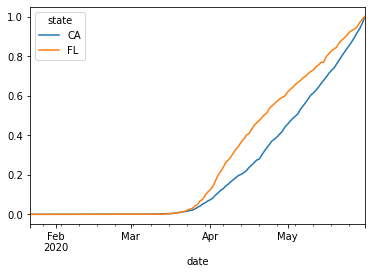

In [182]:
x = res.loc[:, ['CA','FL']].plot.line()

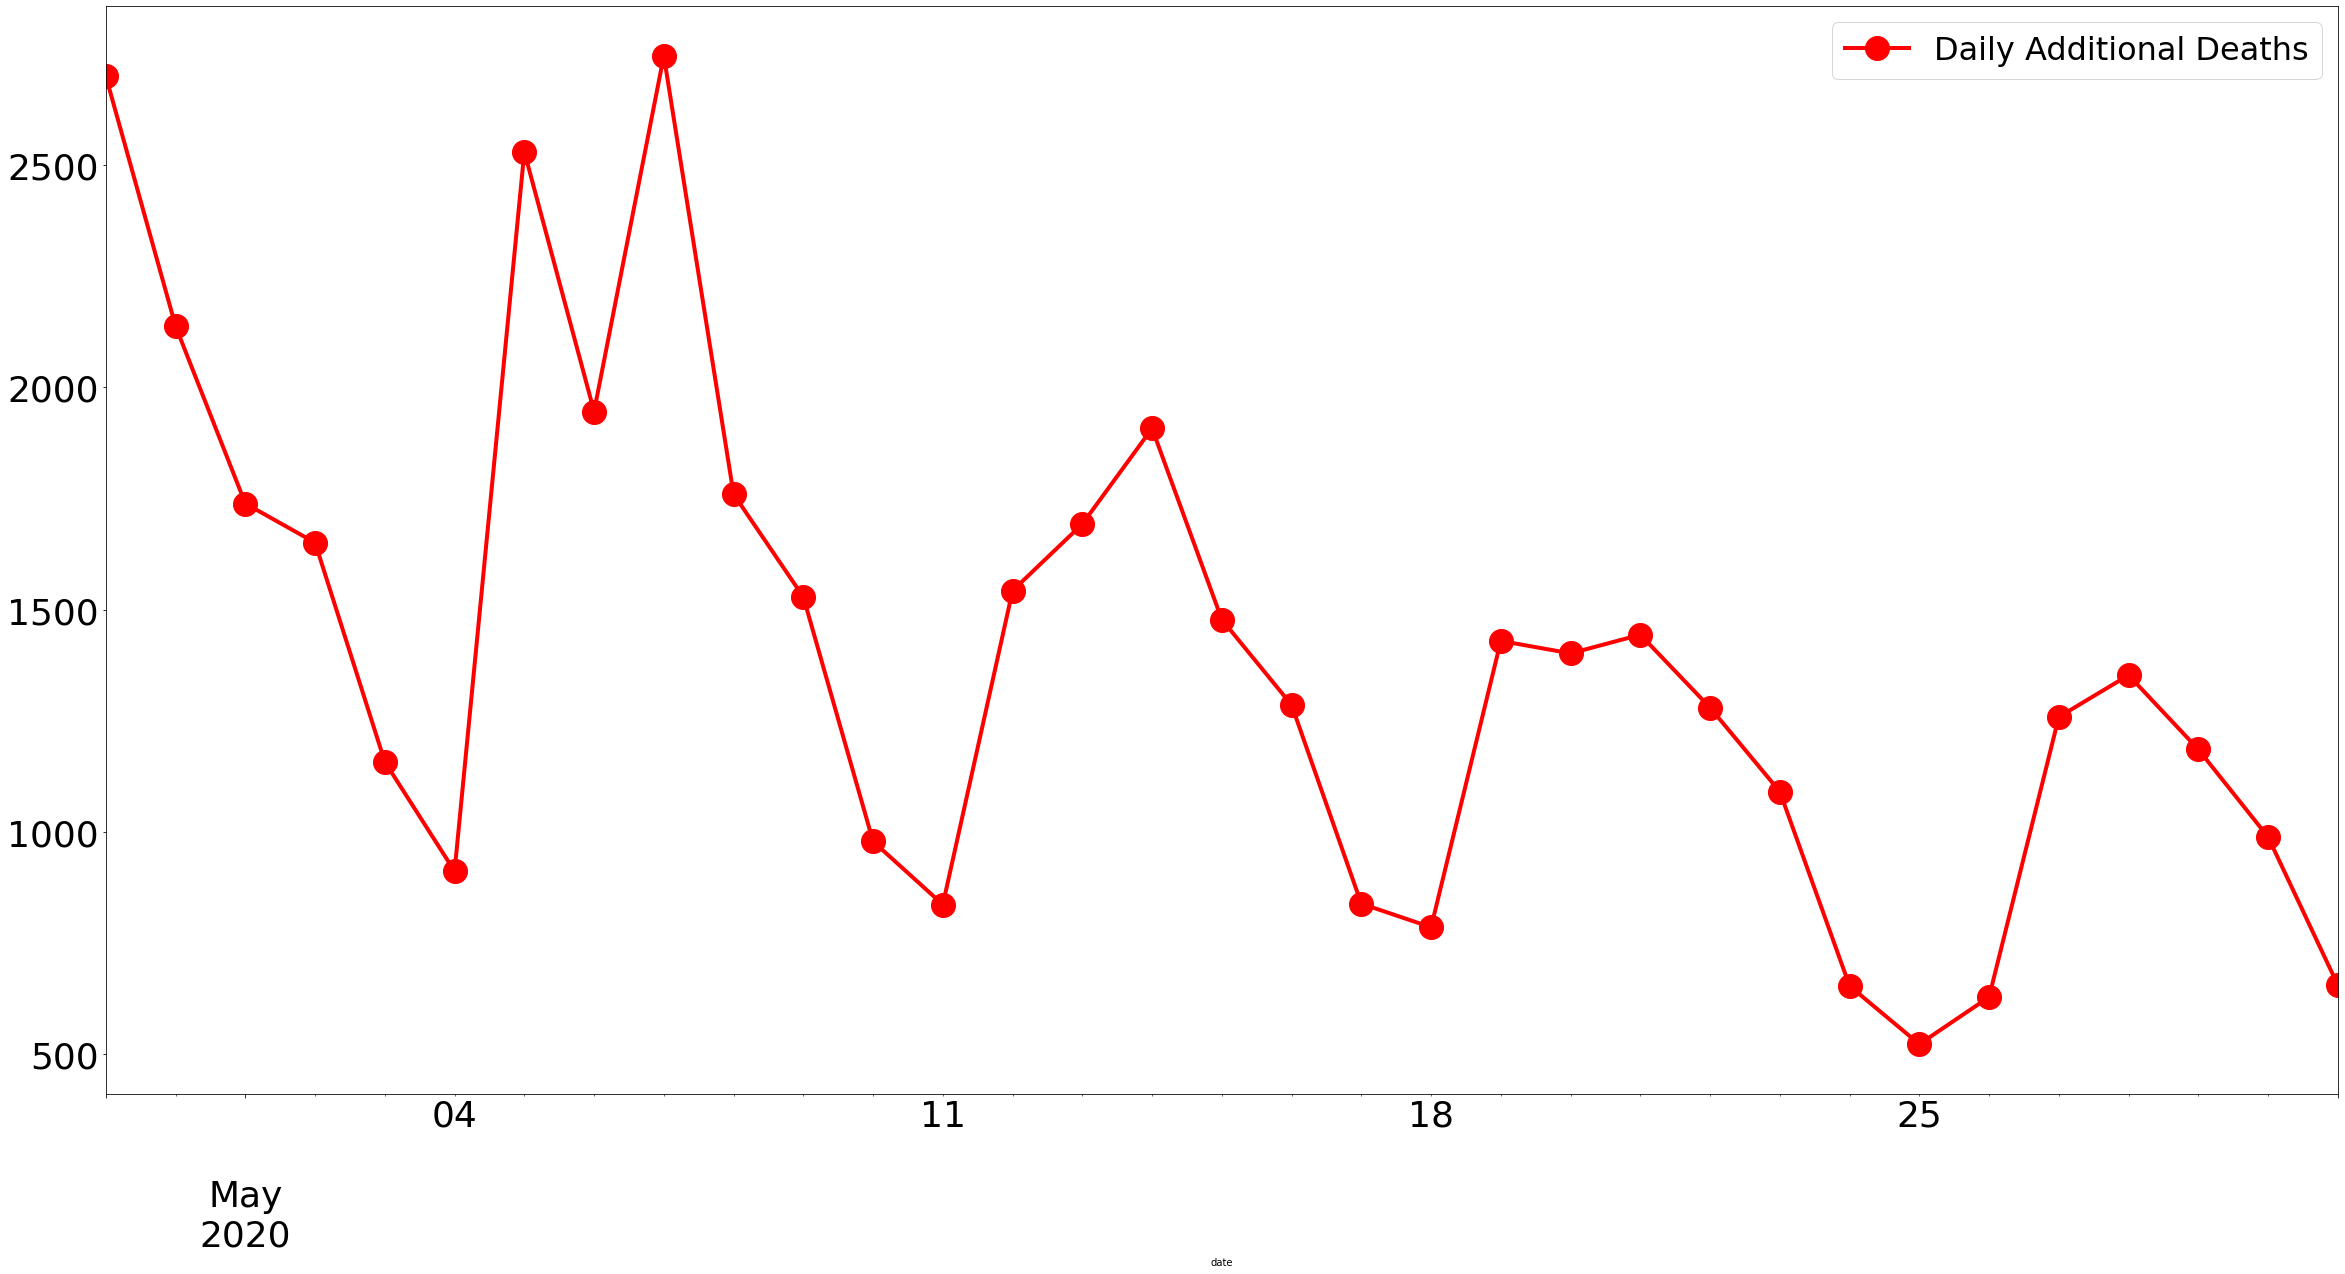

In [183]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


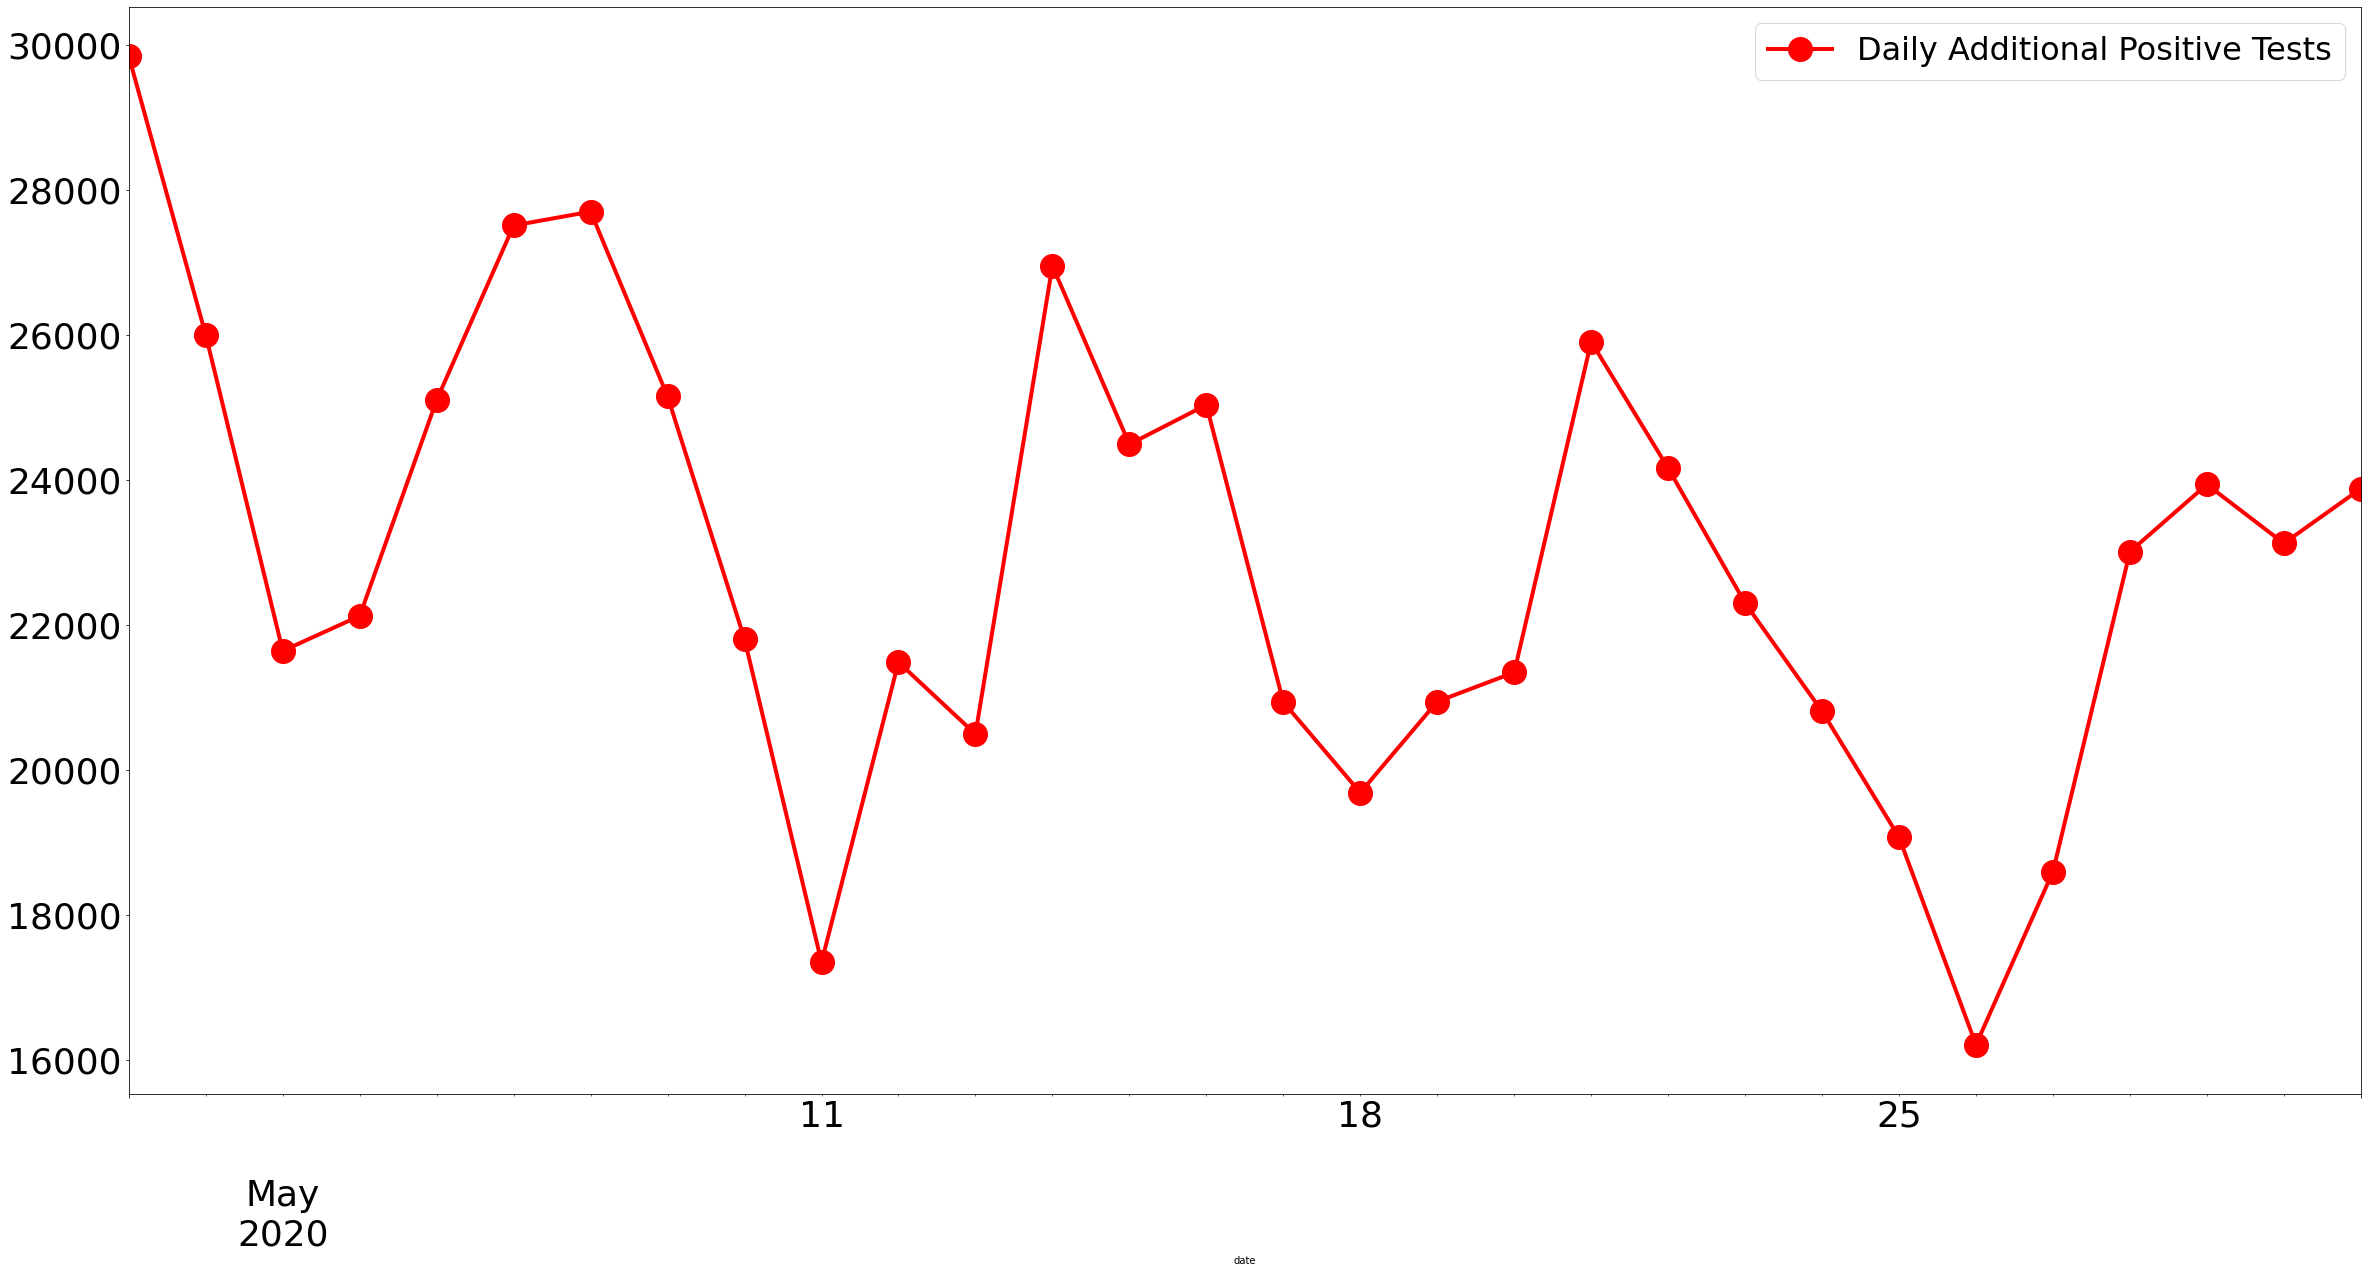

In [184]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()

chart = y1[-30:].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


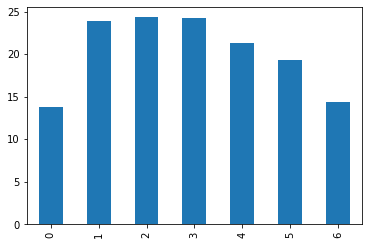

In [187]:
dfDoW.mean().deathIncrease.plot.bar()



In [188]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202016,14063.0,24260.0,844332.0,199843.0,1044175.0
202017,12864.0,18512.0,1319356.0,209064.0,1528420.0
202018,12704.0,24872.0,1462961.0,191865.0,1654826.0
202019,12402.0,18998.0,1747407.0,171010.0,1909104.0
202020,9584.0,12129.0,2324282.0,156723.0,2481005.0
202021,8087.0,15648.0,2548088.0,155132.0,2703220.0
202022,6595.0,26480.0,2625387.0,147810.0,2773197.0


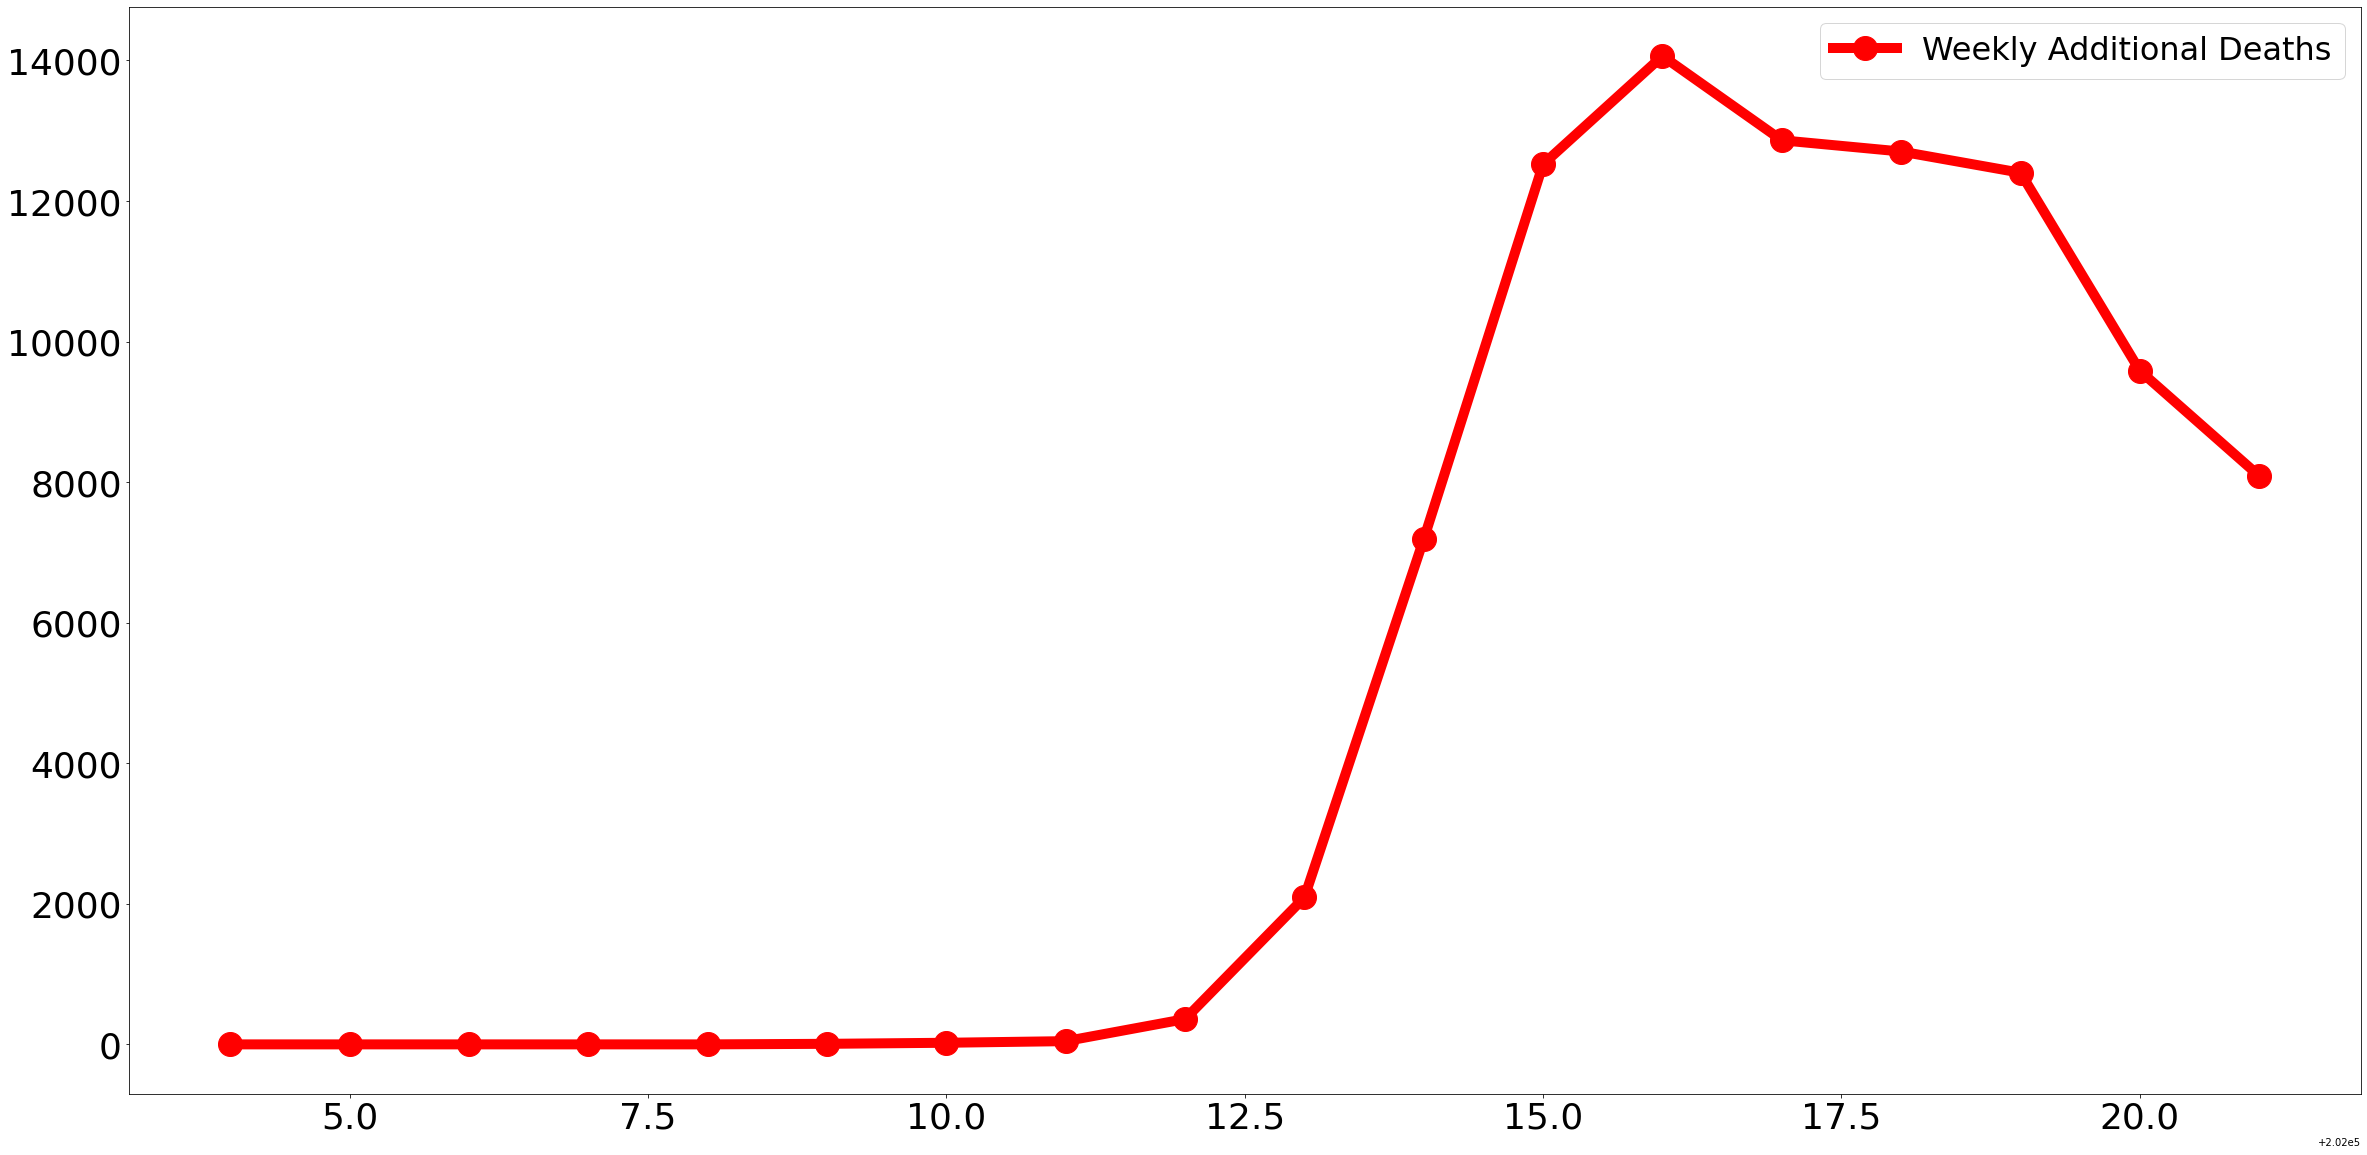

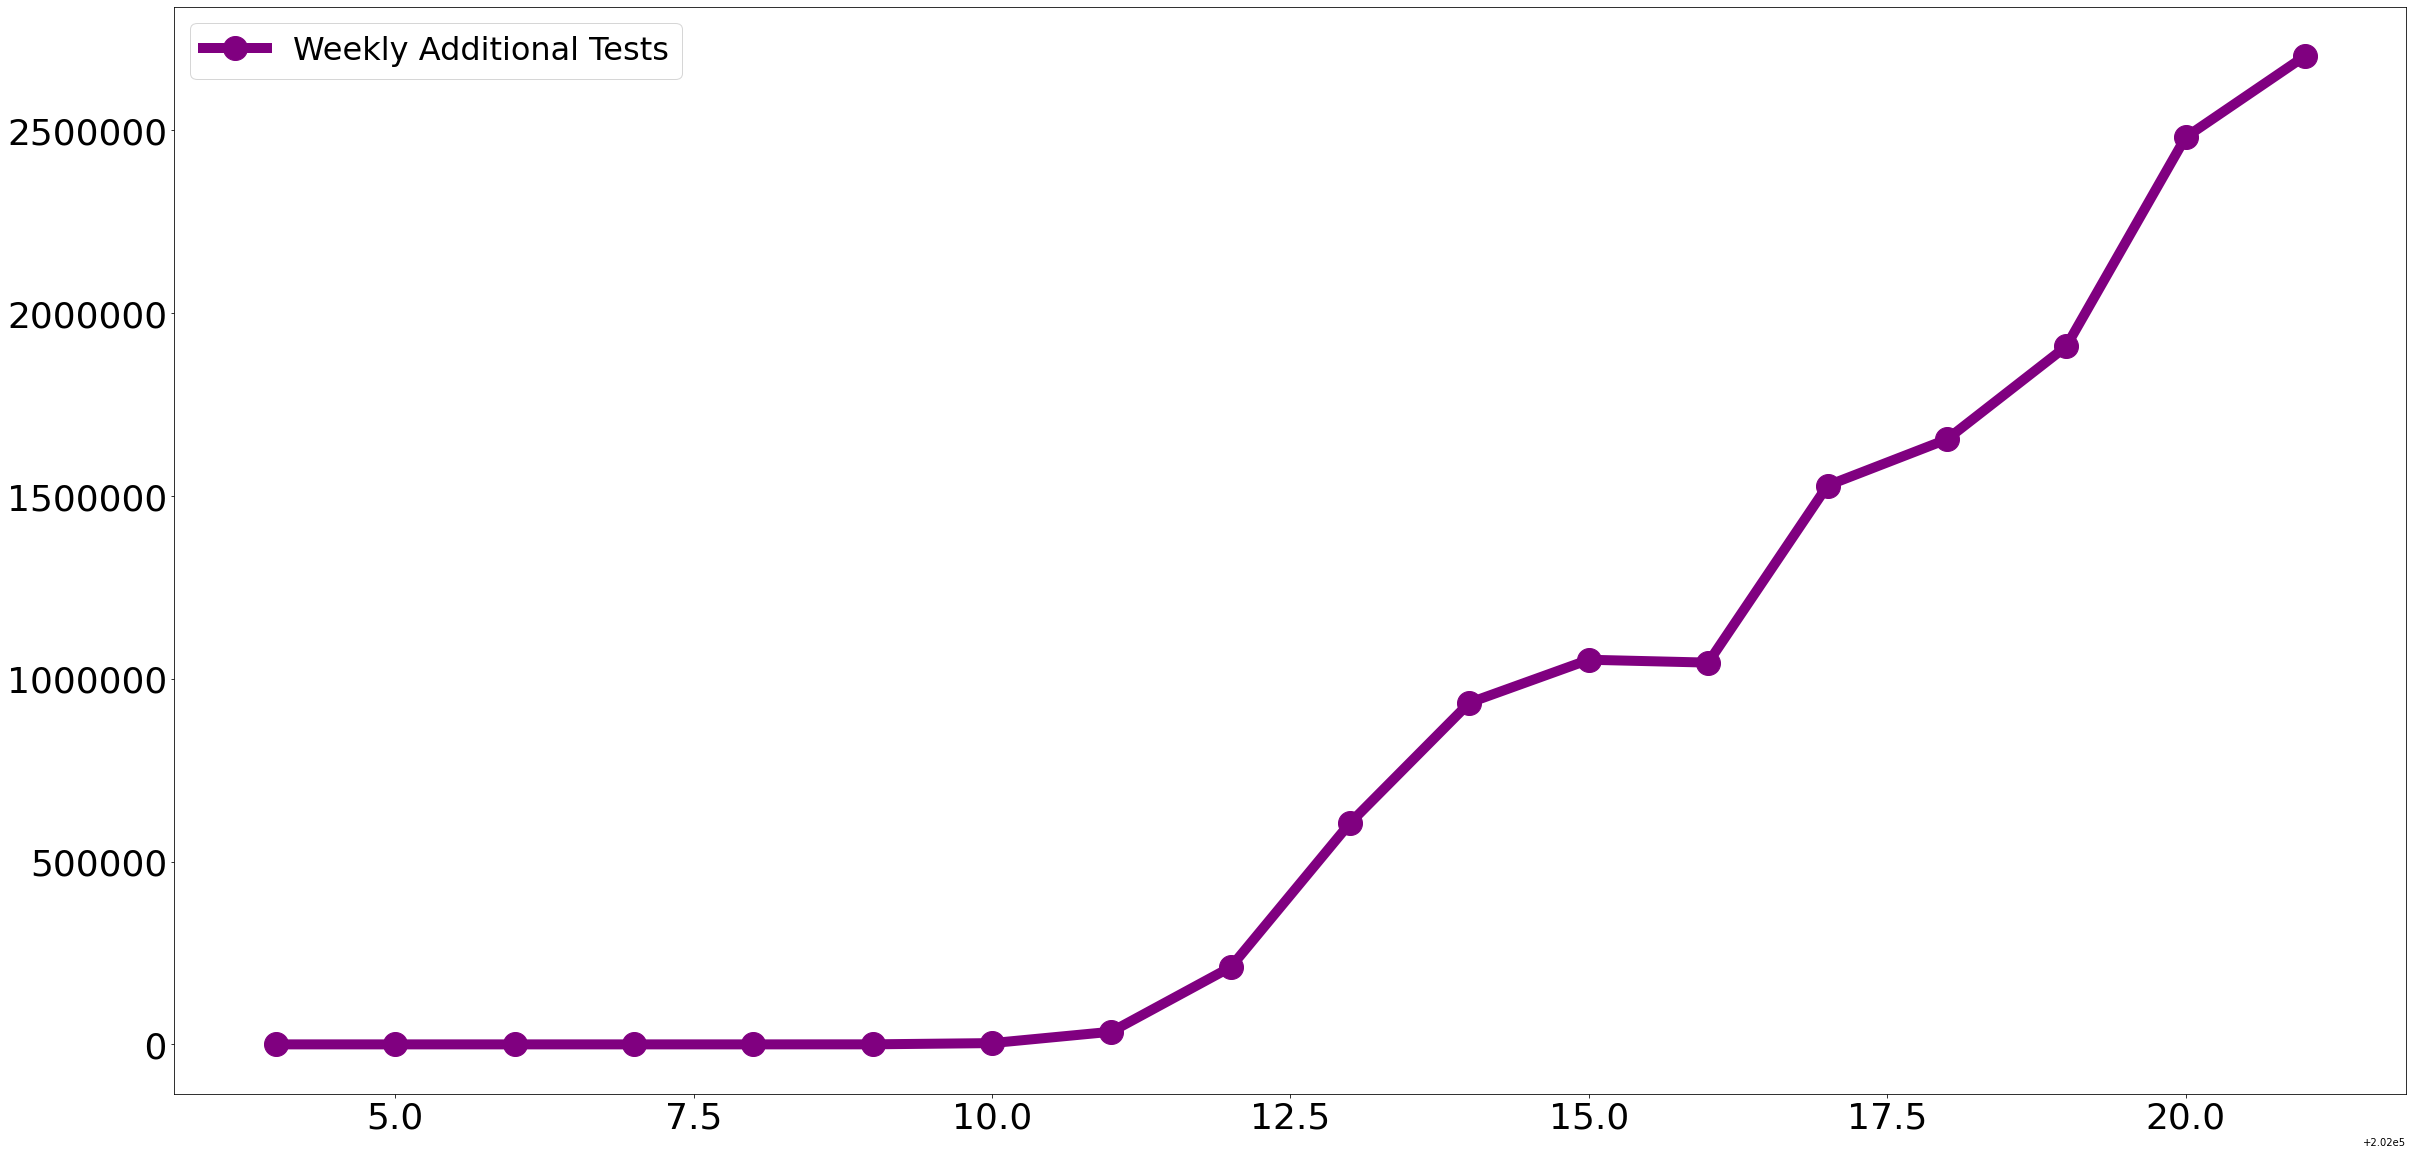

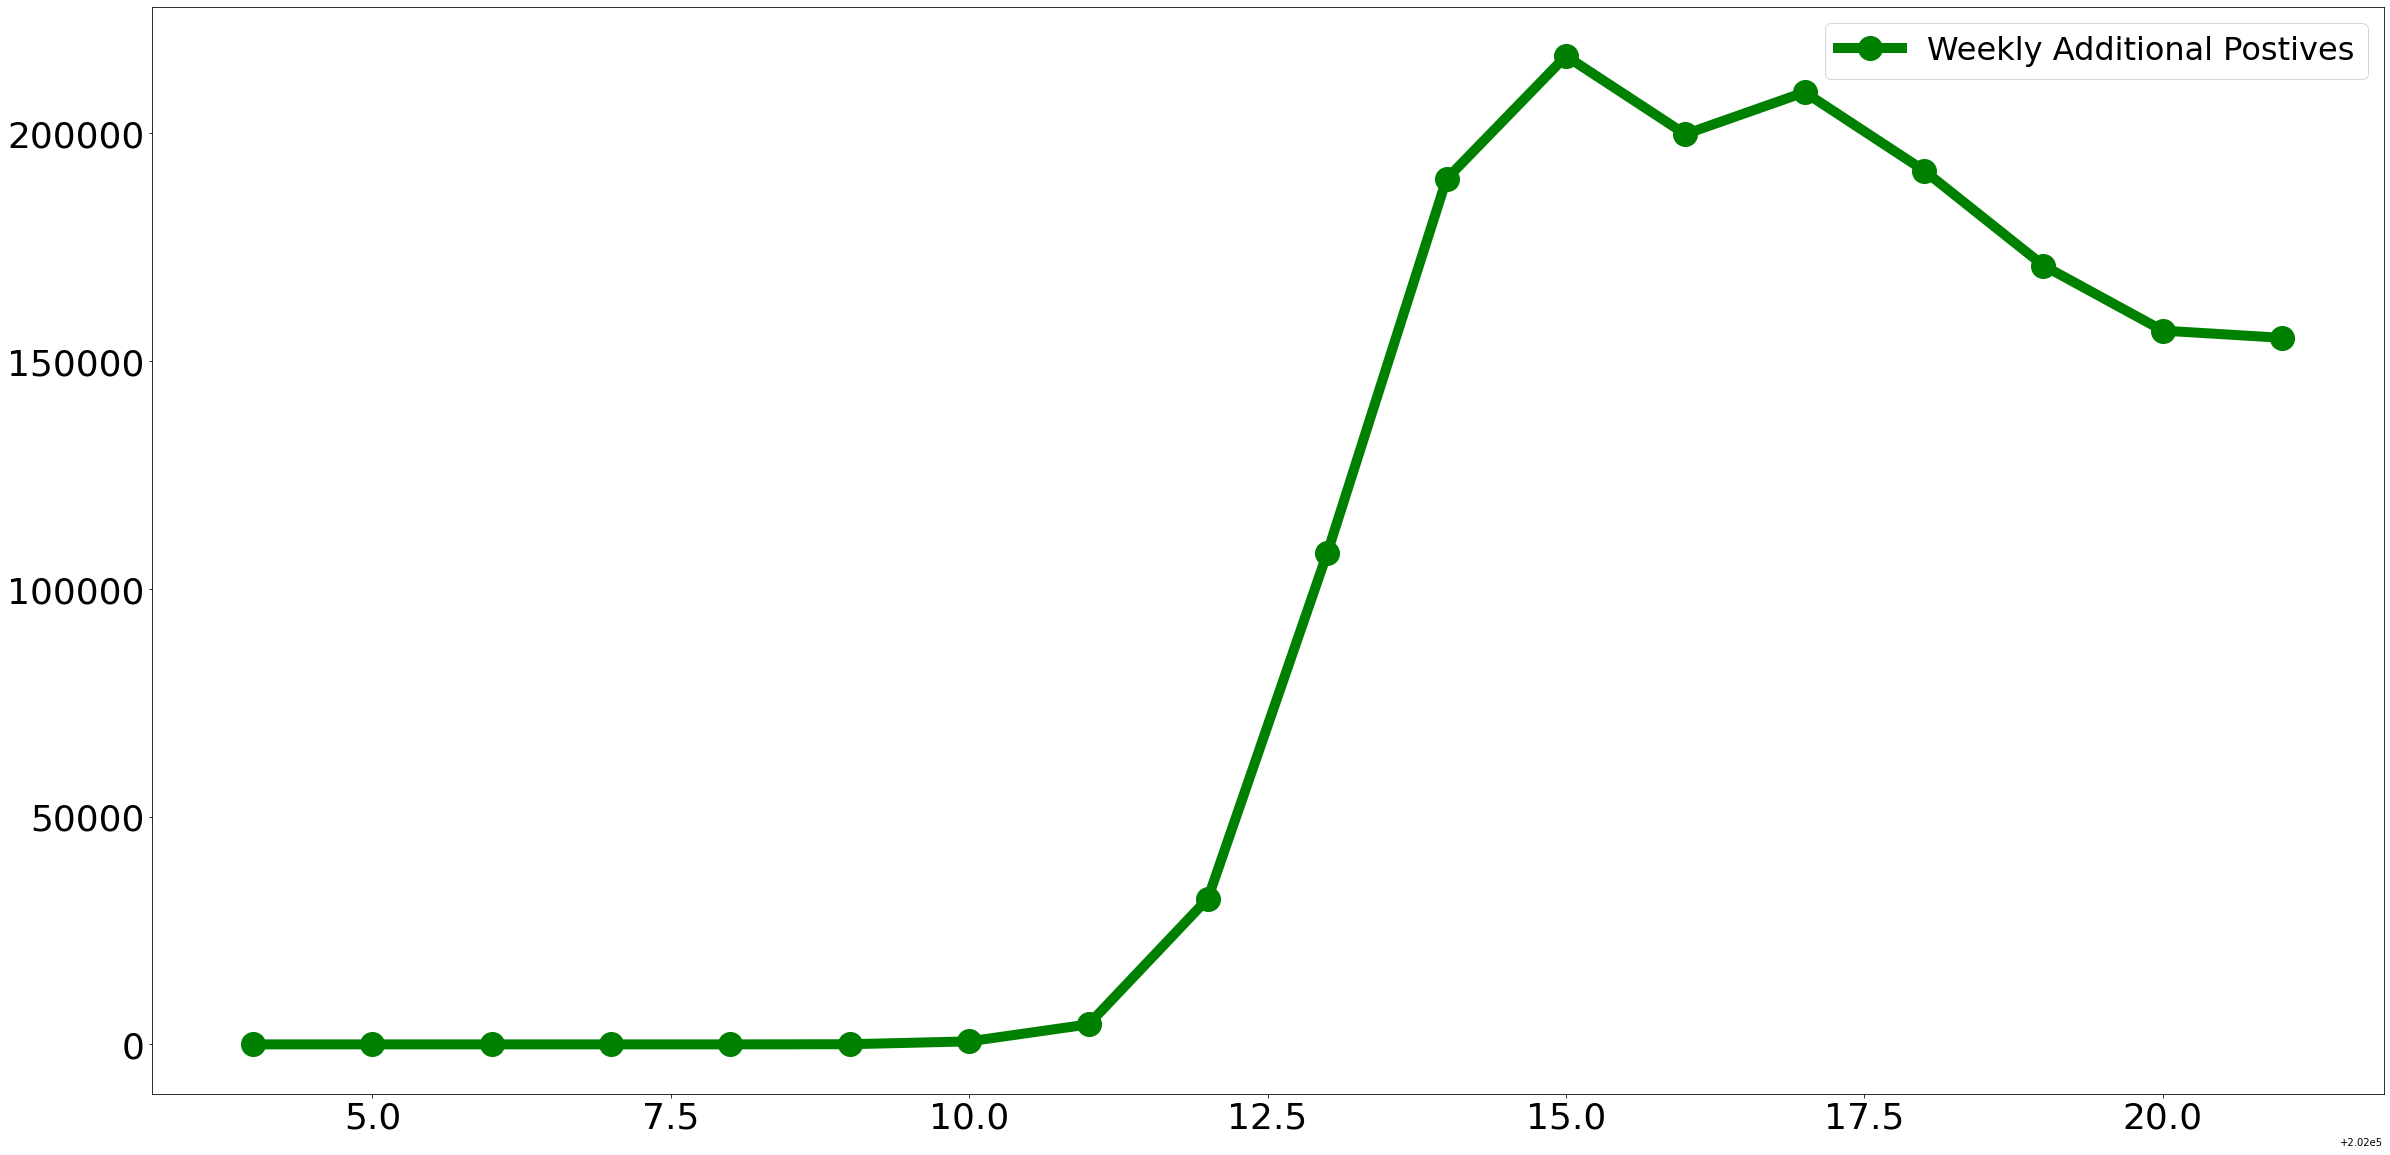

In [189]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

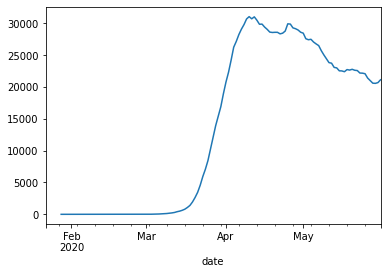

In [119]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

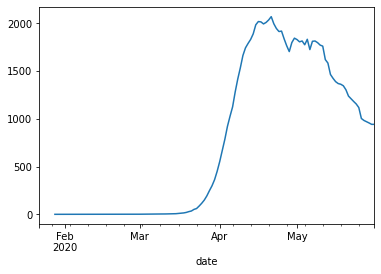

In [120]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

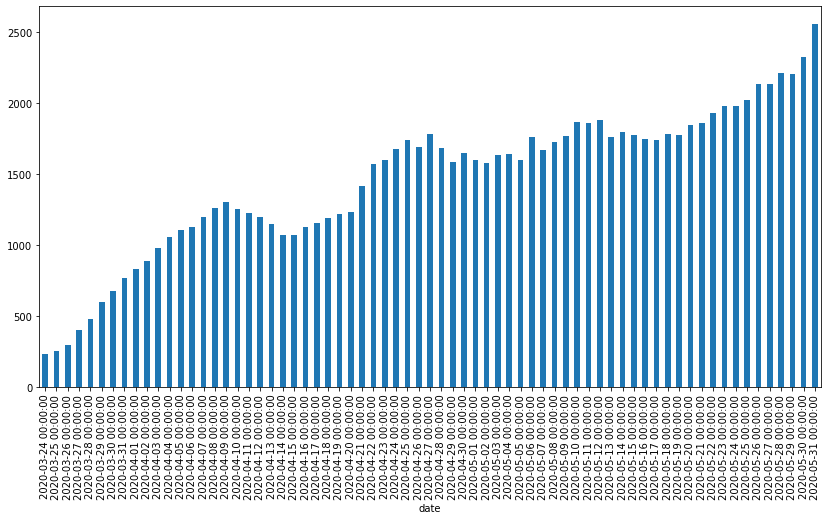

In [122]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


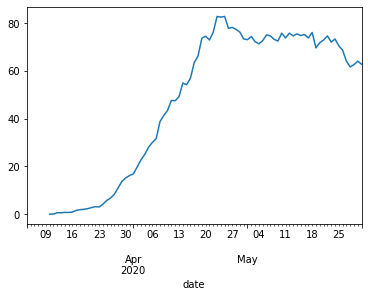

In [123]:
dfCAAvg.deathIncrease.plot.line()

In [124]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['AL']))].head(10)

,state,date,positive,death,total_positive,pct
87,AL,2020-05-31,17903,631,17903,1.000000
88,AL,2020-05-30,17359,618,17903,0.969614
89,AL,2020-05-29,16823,605,17903,0.939675
90,AL,2020-05-28,16310,590,17903,0.911020
91,AL,2020-05-27,15843,581,17903,0.884935
92,AL,2020-05-26,15396,575,17903,0.859968
93,AL,2020-05-25,14730,562,17903,0.822767
94,AL,2020-05-24,14327,551,17903,0.800257
95,AL,2020-05-23,13938,546,17903,0.778529
96,AL,2020-05-22,13563,537,17903,0.757583


In [125]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=14)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
2175,MN,2020-05-17,15668,731,24850,0.630503
2597,NC,2020-05-17,18512,659,28589,0.647522
187,AR,2020-05-17,4759,98,7253,0.656142
101,AL,2020-05-17,11771,488,17903,0.657488
4258,VA,2020-05-17,30388,1009,44607,0.681238
4641,WI,2020-05-17,12543,453,18403,0.681574
351,AZ,2020-05-17,13937,680,19936,0.699087
3651,PR,2020-05-17,2646,123,3776,0.700742
440,CA,2020-05-17,78839,3261,110583,0.712940
1997,ME,2020-05-17,1687,70,2325,0.725591


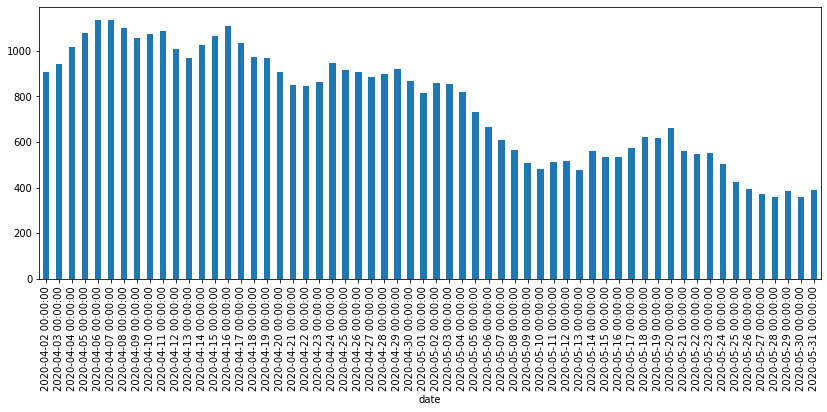

In [126]:

def showStateData(state):
  return dfCovidtracking[dfCovidtracking.state==state]\
  .sort_index()\
  .copy()



chart = showStateData('MI')\
.positiveIncrease\
.rolling(window=7)\
.mean()[-60:].plot.bar(figsize=(14,5))

In [127]:
dfTest = dfCovidtracking[dfCovidtracking.state=='CA'].sort_index().copy()
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4a075d5c57bdb3c2b68cdc0024a0f5c14b77cb67,2020-03-04T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,29660d4104d8a82ef4d69e5359cc586629d587ef,2020-03-05T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0bb79dc4f15a1eb8575ec0ca84b4e6b1f801756f,2020-03-06T21:00:00Z,0,0.0,522,522,522,06,0.0,0.0,0.0,7.0,7.0
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,e233a4c19e477fd4f7bcf450c3a73790f87a5680,2020-03-07T21:00:00Z,0,0.0,531,531,531,06,0.0,0.0,0.0,9.0,9.0
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,a34b3bacf8a39873680d04e62a718fc240a6ab06,2020-03-08T20:00:00Z,0,0.0,550,550,550,06,0.0,0.0,0.0,19.0,19.0


In [128]:
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4a075d5c57bdb3c2b68cdc0024a0f5c14b77cb67,2020-03-04T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,29660d4104d8a82ef4d69e5359cc586629d587ef,2020-03-05T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0bb79dc4f15a1eb8575ec0ca84b4e6b1f801756f,2020-03-06T21:00:00Z,0,0.0,522,522,522,06,0.0,0.0,0.0,7.0,7.0
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,e233a4c19e477fd4f7bcf450c3a73790f87a5680,2020-03-07T21:00:00Z,0,0.0,531,531,531,06,0.0,0.0,0.0,9.0,9.0
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,a34b3bacf8a39873680d04e62a718fc240a6ab06,2020-03-08T20:00:00Z,0,0.0,550,550,550,06,0.0,0.0,0.0,19.0,19.0


# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [131]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.index.max()][['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1783570
negative    15153321
pending         3270
death          98536
total       16940161
dtype: int64
Current Infection Rate 10.528648%
Percentage of US affected: 0.573394%
Observed CFR: 5.524650%
Percentage of US tested/affected: 5.189938%
Projected affected by cir = 34,559,186
Projected killed = 1,909,275


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.index.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [139]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.905924,10.608983
NJ,1.806368,8.400462
RI,1.409151,14.583603
MA,1.406818,8.601418
DC,1.247044,6.586336
CT,1.183663,7.013348
DE,0.975390,6.230565
IL,0.949035,7.088634
MD,0.872987,4.993334


In [140]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 5.159918%


In [141]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

# OWID Data

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [191]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20976 entries, 0 to 20975
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         20912 non-null  object 
 1   location                         20976 non-null  object 
 2   date                             20976 non-null  object 
 3   total_cases                      20976 non-null  int64  
 4   new_cases                        20976 non-null  int64  
 5   total_deaths                     20976 non-null  int64  
 6   new_deaths                       20976 non-null  int64  
 7   total_cases_per_million          20591 non-null  float64
 8   new_cases_per_million            20591 non-null  float64
 9   total_deaths_per_million         20591 non-null  float64
 10  new_deaths_per_million           20591 non-null  float64
 11  total_tests                      5631 non-null   float64
 12  new_tests         

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [194]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    16099515.0
RUS    10316200.0
DEU     3952971.0
ITA     3824621.0
IND     3611599.0
          ...    
BOL       26190.0
MMR       23951.0
MDV       21639.0
CRI       18194.0
ZWE       16440.0
Name: total_tests, Length: 84, dtype: float64

In [195]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 51068844
Total tests done in USA : 16099515
How many more times has the world tested more than the US: 3.2


In [196]:
dfOwidLatest[isUSA].sum()

location                                                         United States
date                                                                2020-05-29
total_cases                                                            1721750
new_cases                                                                21817
total_deaths                                                            101617
new_deaths                                                                1175
total_cases_per_million                                                5201.62
new_cases_per_million                                                   65.912
total_deaths_per_million                                               306.998
new_deaths_per_million                                                    3.55
total_tests                                                        1.60995e+07
new_tests                                                               492276
total_tests_per_thousand                            

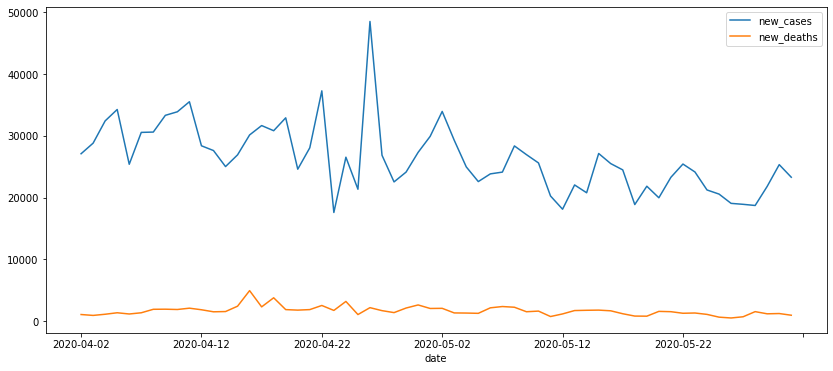

In [197]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-60:].plot.line(figsize=(14,6))

In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state]\
.rolling(window=7).mean()


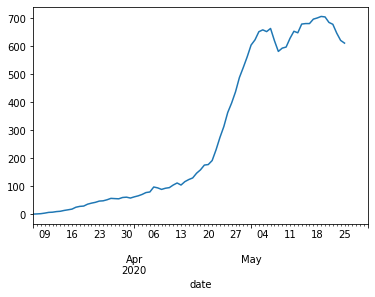

In [199]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [200]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

56163

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'][['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [154]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,286.0,895.0,71079.0,5183.0,76262.0
1,438.0,1516.0,63965.0,7529.0,71494.0
2,350.0,1766.0,-18947.0,7948.0,-10999.0
3,325.0,1130.0,51311.0,6465.0,57776.0
4,309.0,1224.0,81259.0,8198.0,89457.0
5,203.0,1095.0,81125.0,5966.0,87091.0
6,131.0,320.0,88747.0,5695.0,94442.0


# Socrata (San Francisco) Data

In [202]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [205]:
results_df.case_disposition.unique()

array(['Confirmed', 'Death'], dtype=object)

In [0]:
res = results_df.astype({'case_count':'int16'})

In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [0]:
dfTotals = dfresConf.groupby(by='date').sum().join(dfresDead.groupby(by='date').sum(), \
        rsuffix='dead').fillna(0) \
        .rename(columns={'case_count':'positive', 'case_countdead':'dead'})

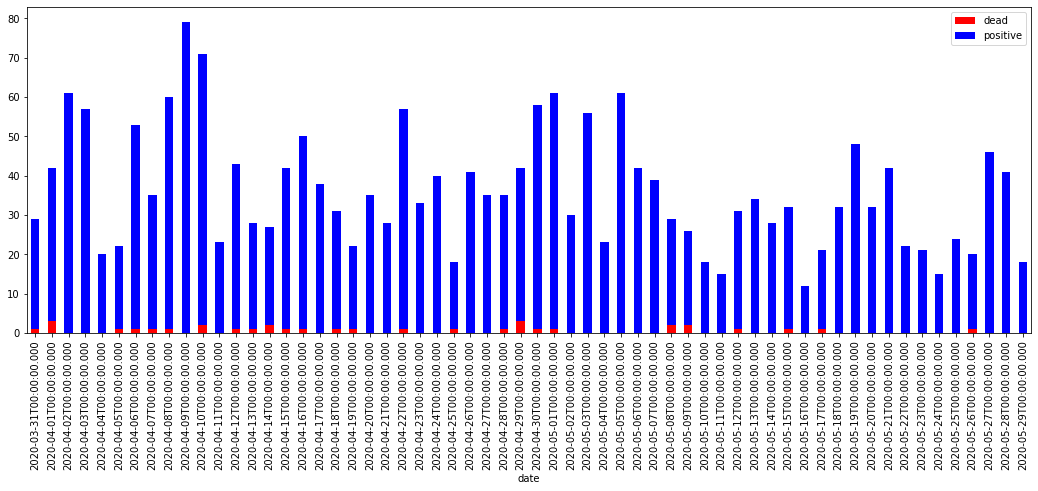

In [209]:
chart = dfTotals[['dead', 'positive']][-60:]\
.plot.bar(figsize=(18,6),stacked=True, color=['red','blue'])

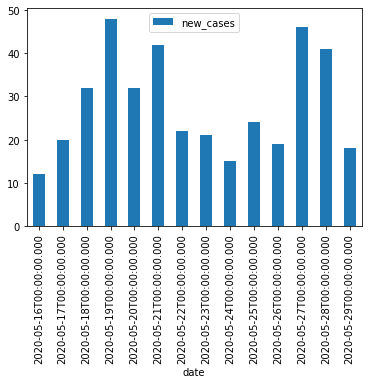

In [210]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail(14).plot.bar()

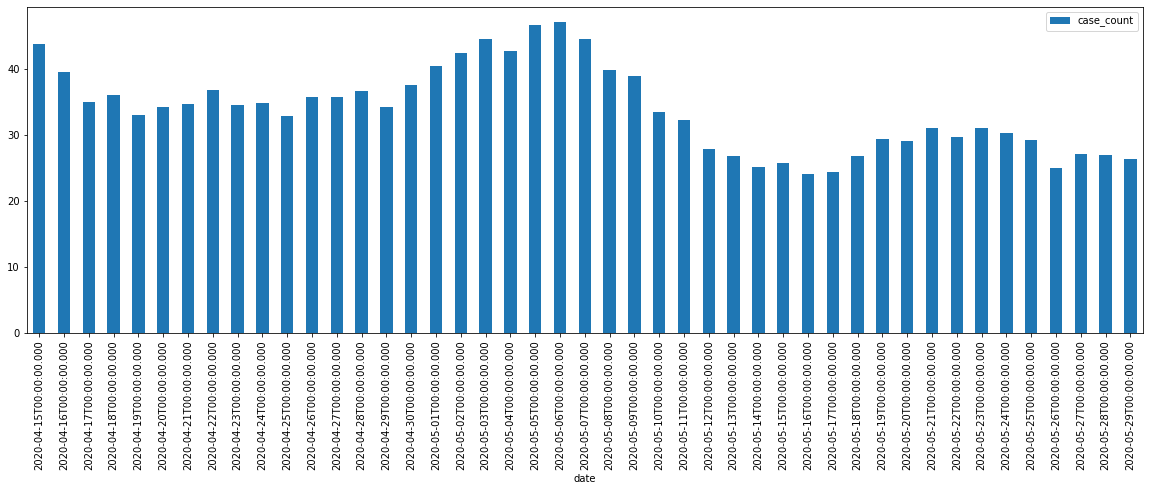

In [211]:
dfresConf.groupby('date').sum().rolling(window=7).mean()[-45:].plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [213]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-05-27,430,14.0,12064.0,52.0,274.0
2020-05-28,436,14.0,12428.0,52.0,289.0
2020-05-29,450,14.0,12712.0,52.0,305.0
2020-05-30,466,14.0,13186.0,52.0,312.0
2020-05-31,483,14.0,13579.0,52.0,317.0


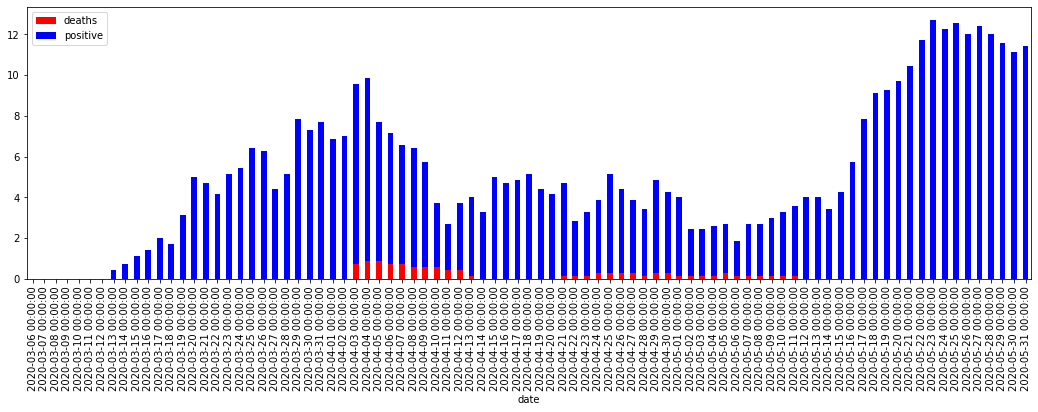

In [214]:
chart= df[['deaths','positive']].diff()\
.rolling(window=7).mean()[-90:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

In [215]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.19%
Marin Population Tested: 5.23%


In [216]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-05-27    12.428571
2020-05-28    12.000000
2020-05-29    11.571429
2020-05-30    11.142857
2020-05-31    11.428571
Name: positive, dtype: float64

In [217]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(28)[::-1].positive.diff()


date
2020-05-04       NaN
2020-05-05    1275.0
2020-05-06    2603.0
2020-05-07    1799.0
2020-05-08    1898.0
2020-05-09    2049.0
2020-05-10    2119.0
2020-05-11    1259.0
2020-05-12    1443.0
2020-05-13    1759.0
2020-05-14    2023.0
2020-05-15    1772.0
2020-05-16    1857.0
2020-05-17    2046.0
2020-05-18    1591.0
2020-05-19    1365.0
2020-05-20    2262.0
2020-05-21    2140.0
2020-05-22    2247.0
2020-05-23    2187.0
2020-05-24    2079.0
2020-05-25    1848.0
2020-05-26    2175.0
2020-05-27    2247.0
2020-05-28    2717.0
2020-05-29    2189.0
2020-05-30    2992.0
2020-05-31    3705.0
Name: positive, dtype: float64